<a href="https://colab.research.google.com/github/dssalazarp/SenalesSistemas/blob/master/Copia_de_Parcial2SyS_Grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOLUCIÓN EXAMEN 2 DE SEÑALES Y SISTEMAS

Jose Alejandro Velasco Mondragón
David Santiago Salazar
Julian David Rivera Prada

## PUNTO 1:
Encuentre la expresion del espectro de Fourier (forma exponencial y trigonom ´ etrica) para la señal ˜ x(t) = |A cos(2πF ot)|
2
, con t ∈
[−
1
2Fo
,
1
2Fo
], con A, Fo ∈ R
+. Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud
y fase como diagrama de Bode en decibelios), y presente el error relativo y la senal reconstruida para ˜ N = {1, 2, . . . , 50}.

In [1]:
# CODIGO SOBRE LA SERIE TRIGONOMETRICA Y LA SERIE EXPONENCIAL DE FOURIER
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

x(t)= (abs(A*cos(2*pi*F*t)))


SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (<ipython-input-1-3595cefcfe27>, line 6)

## PUNTO 2

 Sea la señal portadora $c(t)=A_c\sin(2\pi F_c t)$, con $Ac, Fc\in \mathbb{R}$, y la señal mensaje $m(t) \in \mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t)= \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde youtube 5 segundos de su canción
favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el índice de modulación deseado.

1. instalacion de librerias


In [78]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-7cfmxk07/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp
  Attempting uninstall: yt-dlp
    Found existing installation: yt-dlp 2025.1.26
    Uninstalling yt-dlp-2025.1.26:
      Successfully uninstalled yt-dlp-2025.1.26


2. Descargar el audio de youtube y convertirlo a .wav


In [79]:
import os
import yt_dlp as youtube_dl
import subprocess
import numpy as np
import matplotlib.pyplot as plt

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

 # Convertir a WAV
    subprocess.call(['ffmpeg', '-y', '-i', mp3_filename, wav_filename])

    return wav_filename

# Descargar y convertir la canción
video_url = "https://www.youtube.com/watch?v=d5xZwx2jciU"  # Reemplaza con la URL de tu video de YouTube
wav_filename = download_ytvid_as_wav(video_url, "alcolirykoz")# nombre con el que se dea guardar el archivo


[youtube] Extracting URL: https://www.youtube.com/watch?v=d5xZwx2jciU
[youtube] d5xZwx2jciU: Downloading webpage
[youtube] d5xZwx2jciU: Downloading tv client config
[youtube] d5xZwx2jciU: Downloading player f3d47b5a
[youtube] d5xZwx2jciU: Downloading tv player API JSON
[youtube] d5xZwx2jciU: Downloading ios player API JSON
[youtube] d5xZwx2jciU: Downloading m3u8 information
[info] d5xZwx2jciU: Downloading 1 format(s): 251
[download] alcolirykoz.mp3 has already been downloaded
[download] 100% of    4.55MiB
[ExtractAudio] Not converting audio alcolirykoz.mp3; file is already in target format mp3
✅ Conversión completa: alcolirykoz.wav


3.
- cargar el archivo .wav
- extraer el fragmento deseado
- crear la portadora
- modular la señal


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
import yt_dlp as youtube_dl
import subprocess

# Parámetros de la modulación
Fc = 48000  # Frecuencia de portadora
Im = float(input("Introduce el índice de modulación : ")) # indice de modulacion

# Cargar el fragmento de audio (5s de la canción)
fragmento_cargado, fs = sf.read("results/fragmento.wav")

# Verificar si el audio es estéreo y convertir a mono si es necesario
if len(fragmento_cargado.shape) > 1:
    fragment = fragmento_cargado.mean(axis=1)  # Promedio de canales para convertir a mono
else:
    fragment = fragmento_cargado

# Generar el vector de tiempo
t = np.arange(0, len(fragment)) / fs

# Calcular la amplitud de la portadora
Ac = np.max(np.abs(fragment)) / Im if np.max(np.abs(fragment)) != 0 else 1

# Generar la señal portadora
carrier = Ac * np.sin(2 * np.pi * Fc * t)

# Modulación AM
y = (1 + (fragment / Ac)) * carrier

# Normalizar las señales para asegurarnos de que están dentro del rango [-1, 1]
#de esta manera se puede escuchar el audio
fragment = fragment / np.max(np.abs(fragment))  # Normaliza la señal mensaje
carrier = carrier / np.max(np.abs(carrier))    # Normaliza la señal portadora
y = y / np.max(np.abs(y))                      # Normaliza la señal modulada

# Guardar los audios en archivos WAV
sf.write("results/mensaje.wav", fragmento_cargado, fs)
sf.write("results/portadora.wav", carrier, fs)
sf.write("results/modulada.wav", y, fs)
print("🎵 Los archivos WAV se han guardado exitosamente:")
print(" - mensaje.wav")
print(" - portadora.wav")
print(" - modulada.wav")


Introduce el índice de modulación : 0.9
🎵 Los archivos WAV se han guardado exitosamente:
 - mensaje.wav
 - portadora.wav
 - modulada.wav


In [81]:
from IPython.display import Audio, display

# Reproducir los audios por separado
print("🎵 Reproduciendo mensaje...")
display(Audio("results/mensaje.wav"))

print("🎵 Reproduciendo portadora...")
display(Audio("results/portadora.wav"))

print("🎵 Reproduciendo señal modulada...")
display(Audio("results/modulada.wav"))


🎵 Reproduciendo mensaje...


🎵 Reproduciendo portadora...


🎵 Reproduciendo señal modulada...


modulacion

Graficar señales en el tiempo

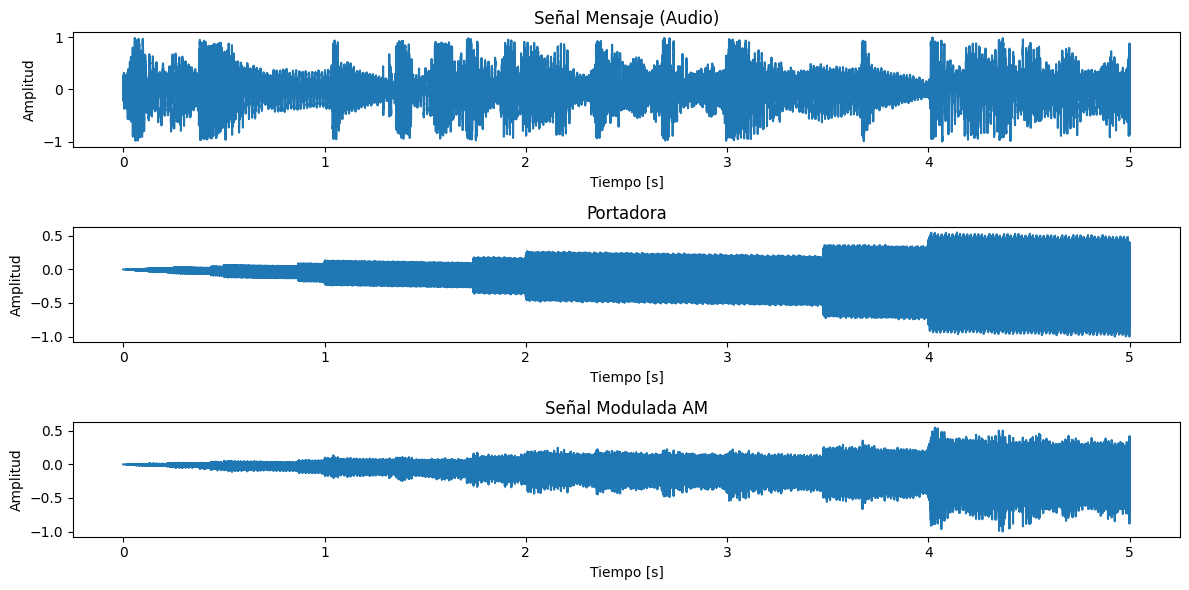

In [82]:
# Graficar señales en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, fragment)
plt.title("Señal Mensaje (Audio)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 2)
plt.plot(t, carrier)
plt.title("Portadora")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 3)
plt.plot(t, y)
plt.title("Señal Modulada AM")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

Transformada de Fourier y graficar en frecuencia

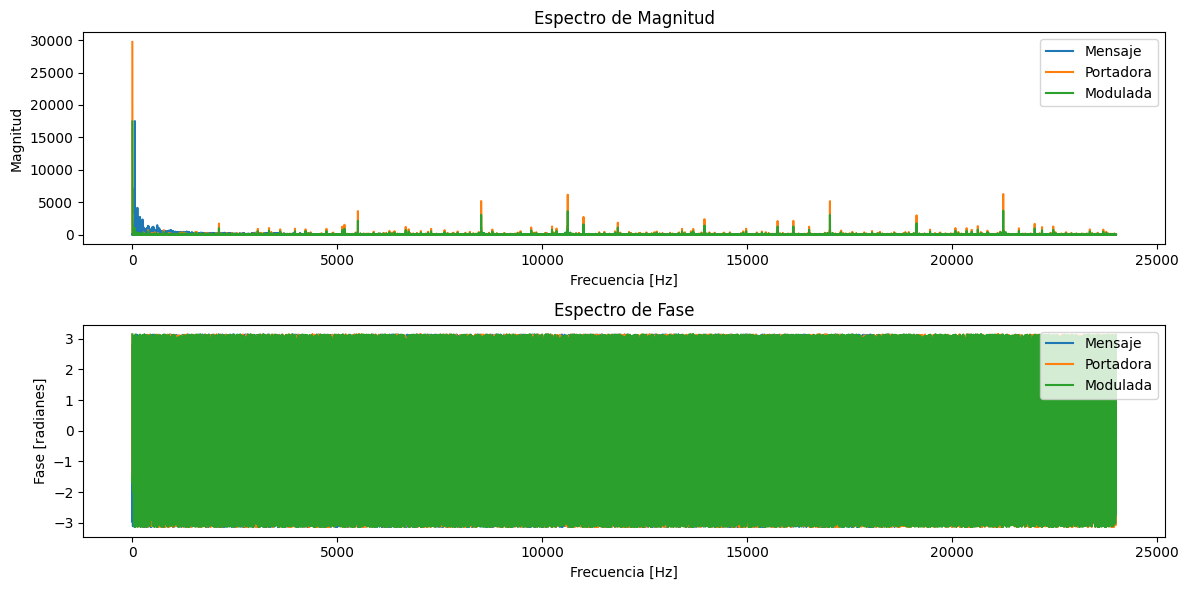

In [83]:
# Transformada de Fourier y graficar en frecuencia
Xf_m = np.fft.fft(fragment)
Xf_c = np.fft.fft(carrier)
Xf_y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(fragment), 1 / fs)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freqs[:len(freqs)//2], abs(Xf_m[:len(freqs)//2]), label='Mensaje')
plt.plot(freqs[:len(freqs)//2], abs(Xf_c[:len(freqs)//2]), label='Portadora')
plt.plot(freqs[:len(freqs)//2], abs(Xf_y[:len(freqs)//2]), label='Modulada')
plt.legend()
plt.title("Espectro de Magnitud")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")

plt.subplot(2, 1, 2)
plt.plot(freqs[:len(freqs)//2], np.angle(Xf_m[:len(freqs)//2]), label='Mensaje')
plt.plot(freqs[:len(freqs)//2], np.angle(Xf_c[:len(freqs)//2]), label='Portadora')
plt.plot(freqs[:len(freqs)//2], np.angle(Xf_y[:len(freqs)//2]), label='Modulada')
plt.legend()
plt.title("Espectro de Fase")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [radianes]")

plt.tight_layout()
plt.show()

audio de la señal

## PUNTO 3
Consulte en que consiste la distorsi ´ on total de armónicos ( ´ Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito
electrico. C ´ omo puede calcularse el THD desde la FFT?. Cómo puede calcularse la distorsi ´ on del factor de potencia con base al ´
THD?. Genere un ejemplo ilustrativo para el calculo del THD y la distorsi ´ on del factor de potencia para un rectificador de onda ´
completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El
usuario podra escoger diferentes valores de R y C. Discuta los resultados obtenidos.

CONSULTA DE LA DISTORSION TOTAL DE ARMONICOS:



¿En qué consiste la distorsión total de armónicos y el factor de potencia de un circuito? (THD)

La distorsión total de armónicos es definida como la cuantificación de qué tanto se distrosiónan los armónicos presentes en una señal. De esa manera, las deformaciones presentes en la gráfica con respecto al tiempo de señales de tensión y corriente (para el caso particular del sistema eléctrico) representan la distorsión de armónicos que suele ser causada por diferentes fenómenos como:
- Transitorios
- Operación en estado estable

¿Cómo puede calcularse la distorsión del factor de potencia con base al THD?

Ejemplo para rectificador de onda completa

## PUNTO 4
Desarrolle un sistema para identificar una palabra clave y autenticar al hablante utilizando herramientas basadas en la Transformada
de Fourier. El sistema debe presentarse como un Dashboard en Streamlit y cumplir con las siguientes condiciones: i) Permitir el
acceso unicamente si un miembro del grupo pronuncia la palabra clave. ii) Denegar el acceso en cualquier otro caso. ´
Ademas, se debe presentar y describir el esquema de soluci ´ on que incluya: i) Dise ´ no del sistema de detecci ˜ on. ii) La base de ´
datos creada para almacenar los patrones de voz y palabras clave. iii) Las consideraciones tecnicas para implementar la soluci ´ on, ´
incluyendo el uso de la Transformada de Fourier para procesar las senales de voz.